In [56]:
# Libraries Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
Url = 'https://raw.githubusercontent.com/IT22106360/QuantaML-FDM-Employee-Retention/main/artifacts/Training_dataset.csv'
OriginalData= pd.read_csv(Url, encoding = "latin-1")
OriginalData

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# Exploring Data set

In [58]:
OriginalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [59]:
OriginalData.shape

(19158, 14)

In [60]:
null_values = OriginalData.isnull().sum()
print(null_values)

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


Visualizing the Original Data set with bar plots

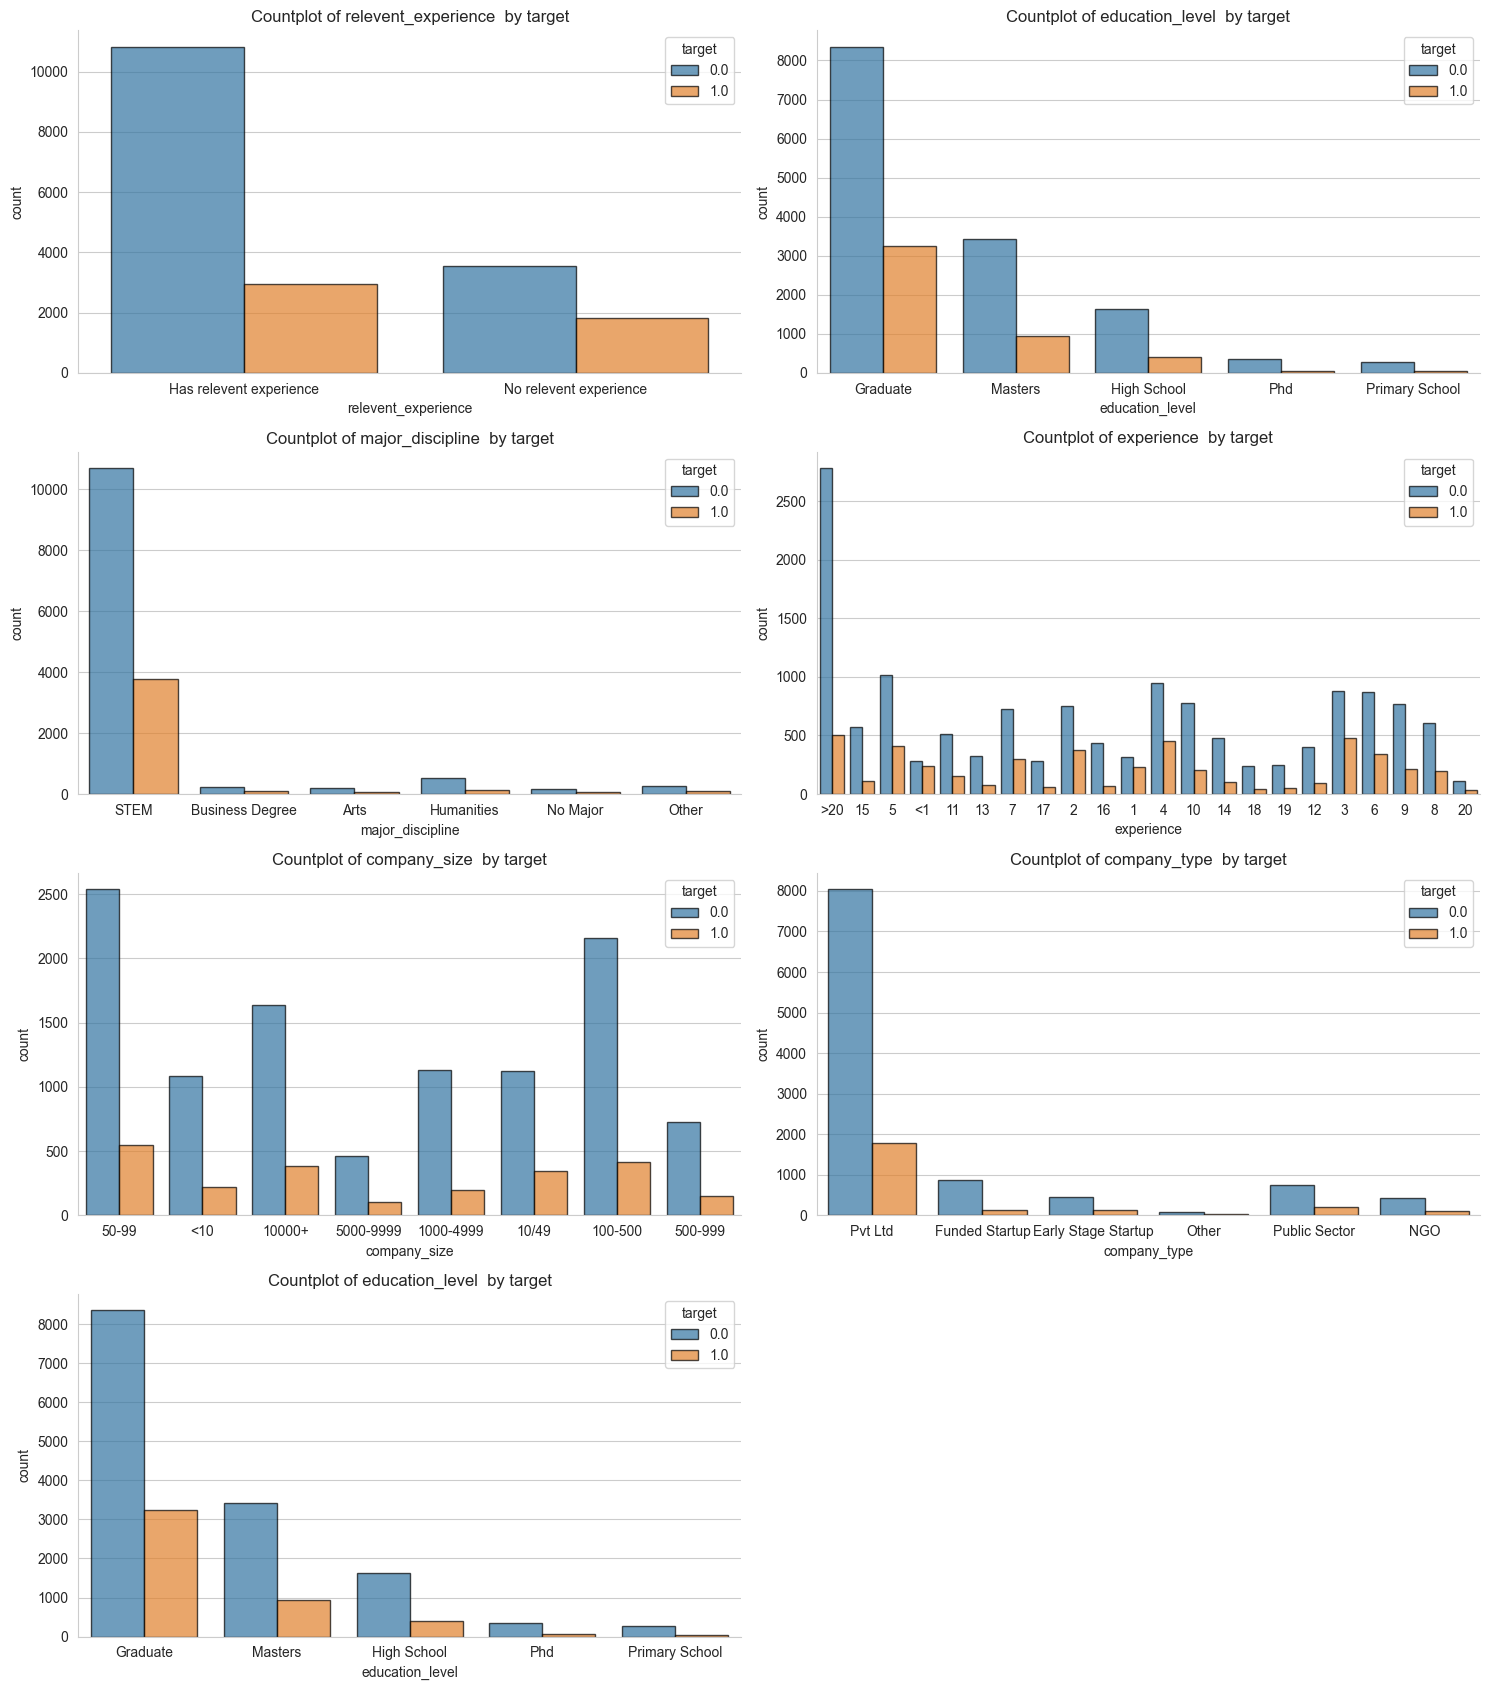

In [61]:
#shows the frequency of each feature against the target

plt.figure(figsize=[15,17])
columns=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type","education_level"]
n=1
for col in columns:
    plt.subplot(4,2,n)
    sns.countplot(x=col, hue='target', edgecolor="black", alpha=0.7, data=OriginalData)
    sns.despine()
    plt.title("Countplot of {}  by target".format(col))
    n=n+1
plt.tight_layout()
plt.show()


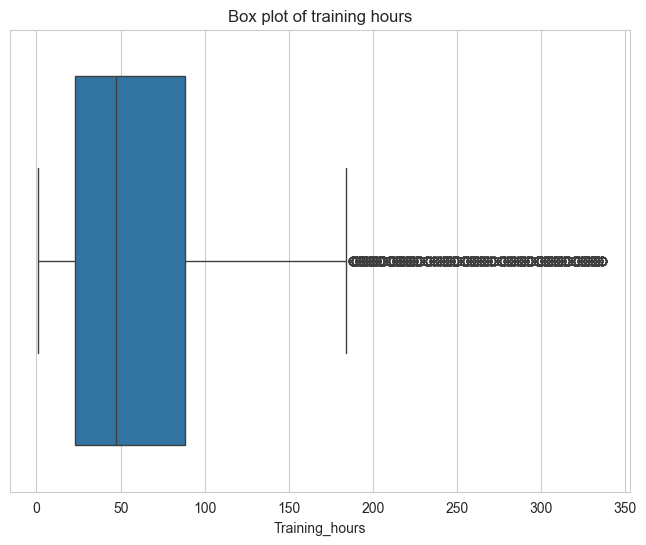

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=[8,6])

sns.boxplot(x=OriginalData["training_hours"])

plt.title("Box plot of training hours") #show case the imbalance if the feature
plt.xlabel("Training_hours")

plt.show()

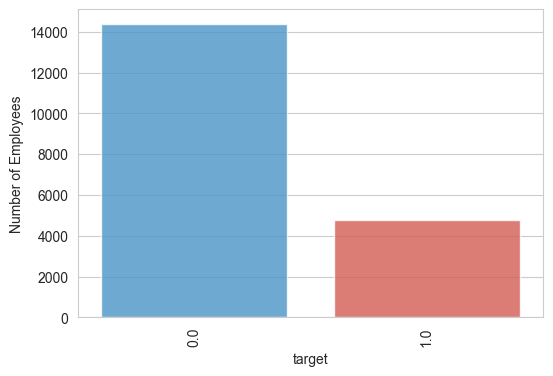

In [63]:
tgt=OriginalData["target"].value_counts()
plt.figure(figsize=[6,4])
colors = ['#3498db', '#e74c3c']
sns.barplot(x=tgt.index,y=tgt.values,hue=tgt.index, palette=colors, alpha=0.8, legend=False)
plt.xlabel("target")
plt.ylabel("Number of Employees")
plt.xticks(rotation=90)
plt.show()

according to the visualization class variable and some others are unbalanced

Preprocessing
-------------

In [64]:
ProcessData = OriginalData.copy()

In [65]:
ProcessData['training Impact'] = ProcessData['city_development_index']*ProcessData['training_hours']

In [66]:
# label Encoding
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0

def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0

def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1
    if x=='Part time course':   return 2

def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1
    if x=='High School'    :   return 2
    if x=='Phd'            :   return 3
    if x=='Primary School' :   return 4

def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1
    if x=='Arts'                   :   return 2
    if x=='Humanities'             :   return 3
    if x=='No Major'               :   return 4
    if x=='Other'                  :   return 5


def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1
    if x=='2'       :   return 2
    if x=='3'       :   return 3
    if x=='4'       :   return 4
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8
    if x=='9'       :   return 9
    if x=='10'      :   return 10
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13
    if x=='14'      :   return 14
    if x=='15'      :   return 15
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19
    if x=='20'      :   return 20
    if x=='>20'     :   return 21

def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1
    if x=='Early Stage Startup'   :   return 2
    if x=='Other'                 :   return 3
    if x=='Public Sector'         :   return 4
    if x=='NGO'                   :   return 5

def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1
    if x=='100-500'      :   return 2
    if x=='1000-4999'    :   return 3
    if x=='10000+'       :   return 4
    if x=='50-99'        :   return 5
    if x=='500-999'      :   return 6
    if x=='5000-9999'    :   return 7

def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1
    if x=='2'            :   return 2
    if x=='3'            :   return 3
    if x=='4'            :   return 4
    if x=='>4'           :   return 5

In [67]:
ProcessData['gender'] = OriginalData['gender'].apply(gender_to_numeric)
ProcessData['relevent_experience'] = OriginalData['relevent_experience'].apply(rel_experience)
ProcessData['enrolled_university'] = OriginalData['enrolled_university'].apply(enrollment)
ProcessData['education_level'] = OriginalData['education_level'].apply(edu_level)
ProcessData['major_discipline'] = OriginalData['major_discipline'].apply(major)
ProcessData['experience'] = OriginalData['experience'].apply(experience)
ProcessData['company_type'] = OriginalData['company_type'].apply(company_t)
ProcessData['company_size'] = OriginalData['company_size'].apply(company_s)
ProcessData['last_new_job'] = OriginalData['last_new_job'].apply(last_job)

In [68]:
ProcessData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     18772 non-null  float64
 6   education_level         18698 non-null  float64
 7   major_discipline        16345 non-null  float64
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  float64
 10  company_type            13018 non-null  float64
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  training Impact         19158 non-null

In [69]:
ProcessData.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,training Impact
0,8949,city_103,0.920,1.0,1,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0,33.120
1,29725,city_40,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0,36.472
2,11561,city_21,0.624,NaN,0,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0,51.792
3,33241,city_115,0.789,NaN,0,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0,41.028
4,666,city_162,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0,6.136
5,21651,city_176,0.764,NaN,1,2.0,0.0,0.0,11.0,NaN,NaN,1.0,24,1.0,18.336
6,28806,city_160,0.920,1.0,1,0.0,2.0,NaN,5.0,5.0,1.0,1.0,24,0.0,22.080
7,402,city_46,0.762,1.0,1,0.0,0.0,0.0,13.0,0.0,0.0,5.0,18,1.0,13.716
8,27107,city_103,0.920,1.0,1,0.0,0.0,0.0,7.0,5.0,0.0,1.0,46,1.0,42.320
9,699,city_103,0.920,NaN,1,0.0,0.0,0.0,17.0,4.0,0.0,5.0,123,0.0,113.160


In [70]:
ProcessData.duplicated().sum()
OriginalData.duplicated().sum()

np.int64(0)

In [71]:
ProcessData.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
training Impact              0
dtype: int64

In [72]:
ProcessData = ProcessData.drop(columns='city')

In [73]:
ProcessData.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,training Impact
0,8949,0.920,1.0,1,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0,33.120
1,29725,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0,36.472
2,11561,0.624,NaN,0,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0,51.792
3,33241,0.789,NaN,0,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0,41.028
4,666,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0,6.136


In [74]:
correlation_with_target = ProcessData.corr()['target'].sort_values(ascending=True)
print(correlation_with_target)

city_development_index   -0.341665
experience               -0.176724
relevent_experience      -0.128430
education_level          -0.091101
last_new_job             -0.082607
training Impact          -0.074508
training_hours           -0.021577
major_discipline         -0.014854
company_size             -0.008695
gender                    0.018034
company_type              0.025326
enrollee_id               0.049475
enrolled_university       0.106561
target                    1.000000
Name: target, dtype: float64


considering correlations

city_development_index   -0.341665
experience               -0.176724
relevent_experience      -0.128430
education_level          -0.091101
last_new_job             -0.082607
training Impact          -0.074508

in the frontend training hours will be given in the fronetend even if it was not taken as a correlation

In [75]:
ProcessData.isnull().sum()

enrollee_id                  0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
training Impact              0
dtype: int64

handling missing values

In [76]:
# education null value
# Fill null values in 'education_level' with 'High School' for rows where at least one of 'enrolled_university' or 'major_discipline' columns is not null

ProcessData.loc[ProcessData['enrolled_university'].notnull() | ProcessData['major_discipline'].notnull(), 'education_level'] = 2

In [77]:
# Fill remaining null values in 'education_level' with 4 (we assumed at least a person who applied for this job have completed atleast primary education)
ProcessData['education_level'].fillna(4, inplace=True)

C:\Users\rashm\AppData\Local\Temp\ipykernel_18736\1060579348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ProcessData['education_level'].fillna(4, inplace=True)


In [78]:
ProcessData.isnull().sum()

enrollee_id                  0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level              0
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
training Impact              0
dtype: int64

Fill 'experience' column missing values
-----------------------------------------

In [79]:
ProcessData.loc[ProcessData['last_new_job'].notnull()| ProcessData['company_type'].notnull()|ProcessData['company_size'].notnull(),'experience']=0

In [80]:
ProcessData['experience'].fillna(0,inplace=True)

C:\Users\rashm\AppData\Local\Temp\ipykernel_18736\4229896563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ProcessData['experience'].fillna(0,inplace=True)


'Last_new_job' column
----------------------

In [81]:
last_new_job_mean=ProcessData.loc[ProcessData['company_type'].notnull()|ProcessData['company_size'].notnull()| ProcessData['relevent_experience']==1,'last_new_job'].mean()
ProcessData['last_new_job'].fillna(last_new_job_mean,inplace=True)

C:\Users\rashm\AppData\Local\Temp\ipykernel_18736\682199691.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ProcessData['last_new_job'].fillna(last_new_job_mean,inplace=True)


In [82]:
ProcessData.duplicated().sum()

np.int64(0)

In [83]:
ProcessData.isnull().sum()

enrollee_id                  0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level              0
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
training Impact              0
dtype: int64

In [84]:
ProcessData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  float64
 3   relevent_experience     19158 non-null  int64  
 4   enrolled_university     18772 non-null  float64
 5   education_level         19158 non-null  float64
 6   major_discipline        16345 non-null  float64
 7   experience              19158 non-null  float64
 8   company_size            13220 non-null  float64
 9   company_type            13018 non-null  float64
 10  last_new_job            19158 non-null  float64
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
 13  training Impact         19158 non-null  float64
dtypes: float64(11), int64(3)
memory usage:

In [85]:
ProcessData.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,training Impact
0,8949,0.920,1.0,1,0.0,2.0,0.0,0.0,NaN,NaN,1.0,36,1.0,33.120
1,29725,0.776,1.0,0,0.0,2.0,0.0,0.0,5.0,0.0,5.0,47,0.0,36.472
2,11561,0.624,NaN,0,1.0,2.0,0.0,0.0,NaN,NaN,0.0,83,0.0,51.792
3,33241,0.789,NaN,0,NaN,2.0,1.0,0.0,NaN,0.0,0.0,52,1.0,41.028
4,666,0.767,1.0,1,0.0,2.0,0.0,0.0,5.0,1.0,4.0,8,0.0,6.136


In [86]:
ProcessData.isnull().sum()

enrollee_id                  0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level              0
major_discipline          2813
experience                   0
company_size              5938
company_type              6140
last_new_job                 0
training_hours               0
target                       0
training Impact              0
dtype: int64

Drop Columns
------------

In [87]:
columns_to_drop = ['training_hours', 'major_discipline', 'company_size', 'gender', 'company_type', 'enrollee_id', 'enrolled_university', 'training Impact']
ProcessData = ProcessData.drop(columns=columns_to_drop)
ProcessData.head()

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1.0
1,0.776,0,2.0,0.0,5.0,0.0
2,0.624,0,2.0,0.0,0.0,0.0
3,0.789,0,2.0,0.0,0.0,1.0
4,0.767,1,2.0,0.0,4.0,0.0


In [88]:
#convert target into integers 
ProcessData['target'] = ProcessData['target'].astype(int)

In [89]:
ProcessData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   relevent_experience     19158 non-null  int64  
 2   education_level         19158 non-null  float64
 3   experience              19158 non-null  float64
 4   last_new_job            19158 non-null  float64
 5   target                  19158 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 898.2 KB


In [90]:
ProcessData.head()

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1
1,0.776,0,2.0,0.0,5.0,0
2,0.624,0,2.0,0.0,0.0,0
3,0.789,0,2.0,0.0,0.0,1
4,0.767,1,2.0,0.0,4.0,0


In [91]:
count = ProcessData.duplicated().sum()
print(count)

17632


In [92]:
print(ProcessData[ProcessData.duplicated()])

       city_development_index  relevent_experience  education_level  \
8                       0.920                    1              2.0   
11                      0.920                    1              2.0   
14                      0.624                    0              2.0   
31                      0.920                    1              2.0   
33                      0.920                    1              2.0   
...                       ...                  ...              ...   
19153                   0.878                    0              2.0   
19154                   0.920                    1              2.0   
19155                   0.920                    1              2.0   
19156                   0.802                    1              2.0   
19157                   0.855                    0              2.0   

       experience  last_new_job  target  
8             0.0           1.0       1  
11            0.0           1.0       0  
14            0.0    

In [93]:
ProcessData.shape

(19158, 6)

In [94]:
ProcessData

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1
1,0.776,0,2.0,0.0,5.0,0
2,0.624,0,2.0,0.0,0.0,0
3,0.789,0,2.0,0.0,0.0,1
4,0.767,1,2.0,0.0,4.0,0
...,...,...,...,...,...,...
19153,0.878,0,2.0,0.0,1.0,1
19154,0.920,1,2.0,0.0,4.0,1
19155,0.920,1,2.0,0.0,4.0,0
19156,0.802,1,2.0,0.0,2.0,0


In [95]:
ProcessData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   relevent_experience     19158 non-null  int64  
 2   education_level         19158 non-null  float64
 3   experience              19158 non-null  float64
 4   last_new_job            19158 non-null  float64
 5   target                  19158 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 898.2 KB


In [96]:
count = OriginalData.duplicated().sum()
print(count)

0


In [97]:
ProcessData = ProcessData.drop_duplicates()
ProcessData

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.000000,1
1,0.776,0,2.0,0.0,5.000000,0
2,0.624,0,2.0,0.0,0.000000,0
3,0.789,0,2.0,0.0,0.000000,1
4,0.767,1,2.0,0.0,4.000000,0
...,...,...,...,...,...,...
18944,0.924,0,2.0,0.0,2.188263,0
19043,0.926,0,2.0,3.0,2.188263,0
19113,0.682,0,2.0,6.0,2.188263,0
19139,0.624,1,2.0,4.0,2.188263,0


In [98]:
ProcessData.isnull().sum()

city_development_index    0
relevent_experience       0
education_level           0
experience                0
last_new_job              0
target                    0
dtype: int64

In [99]:
ProcessData.head()

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1
1,0.776,0,2.0,0.0,5.0,0
2,0.624,0,2.0,0.0,0.0,0
3,0.789,0,2.0,0.0,0.0,1
4,0.767,1,2.0,0.0,4.0,0


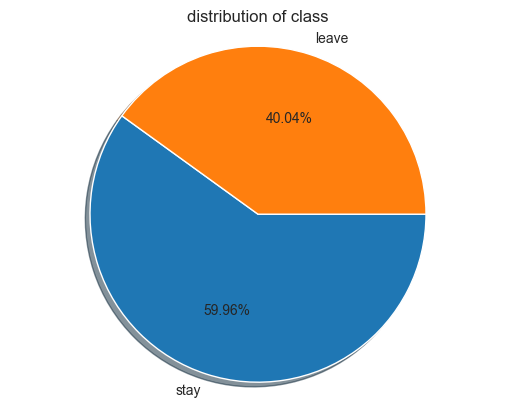

# samples associated with not leaving: 915
# samples associated with leaving: 611


In [100]:
class_occur = ProcessData['target'].value_counts()
classes = ['stay','leave']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=classes, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('distribution of class')
plt.show()
print("# samples associated with not leaving: {}".format(class_occur[0]))
print("# samples associated with leaving: {}".format(class_occur[1]))

Preprocessed data saving 
------------------------

In [101]:
#file_save = "C:/Y3S1_My/New/FDM/Project/Project/QuantaML-FDM-Employee-Retention/artifacts/preprocessed_dataset.csv"
#ProcessData.to_csv(file_save, index=False)